dataset : https://www.kaggle.com/datasets/yasserh/walmart-dataset?select=Walmart.csv

#### Description

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

#### Aim

1. Understand the Dataset & cleanup (if required).
2. Build Regression models to predict the sales w.r.t single & multiple features.
3. Also evaluate the models & compare their respective scores like R2, RMSE,

## Dataset

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file WalmartStoresales. Within this file you will find the following fields:\

1. Store - the store number
2. Date - the week of sales
3. Weekly_Sales - sales for the given store
4. Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
5. Temperature - Temperature on the day of sale
6. Fuel_Price - Cost of fuel in the region
7. CPI – Prevailing consumer price index
8. Unemployment - Prevailing unemployment rate
9. Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [2]:
data = pd.read_csv('Data/Walmart.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


#### Business Understanding

In [4]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


standard deviation of weekly sales is higher than mean

##### Univariate Analysis

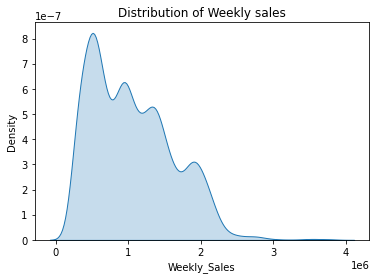

In [5]:
sns.kdeplot(data['Weekly_Sales'], shade=True)
plt.title('Distribution of Weekly sales')
plt.show()

most weekly sales distribution around 500000

In [6]:
#store
data['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

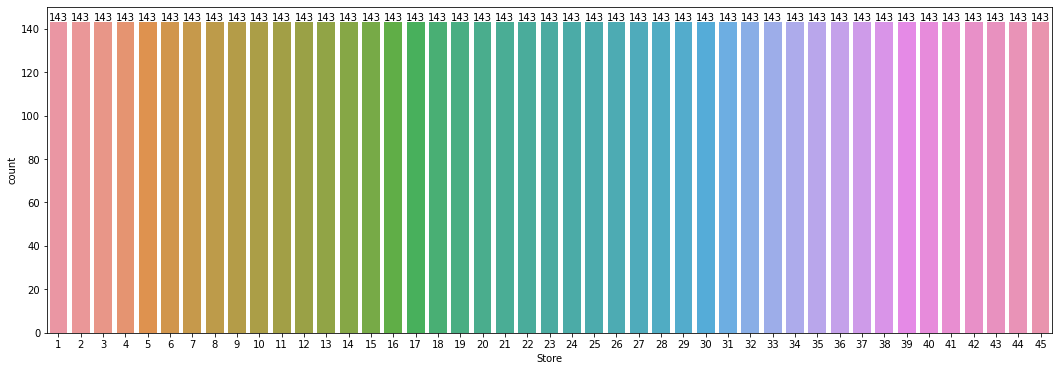

In [21]:
plt.figure(figsize=(18,6))
ax = sns.countplot(x=data['Store'])

for p in ax.patches:
    ax.annotate(p.get_height(),
                xy = (p.get_x()+p.get_width()/2, p.get_height()),
                va = 'bottom', ha='center')

there are 45 store that each store has 143 sales recording throughout 2010 - 2012

In [23]:
#holiday flag
data['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

([<matplotlib.patches.Wedge at 0x51bb1d2400>,
 [Text(-1.073561123911563, 0.23972174124543214, '0'),
  Text(1.0735611183004703, -0.23972176637394407, '1')],
 [Text(-0.5855787948608525, 0.13075731340659932, '93.0%'),
  Text(0.5855787918002564, -0.13075732711306037, '7.0%')])

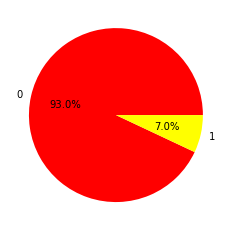

In [27]:
labels = data['Holiday_Flag'].value_counts(sort=True).index
sizes = data['Holiday_Flag'].value_counts(sort=True)
colors = ['red', 'yellow']

plt.pie(sizes, labels=labels, colors=colors, autopct='%0.1f%%')

the presence of holiday week from 2010 - 2012 is 7%

In [38]:
#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
data[data['Date'].isin(['02-12-2010', '02-11-2011', '02-10-2012', '02-08-2013'])]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [40]:
#labor day : 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
data[data['Date'].isin(['09-10-2010', '09-09-2011', '09-07-2012', '09-06-2013'])]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
83,1,09-09-2011,1540471.24,1,76.00,3.546,215.861056,7.962
226,2,09-09-2011,1748000.65,1,77.97,3.546,215.514829,7.852
369,3,09-09-2011,377347.49,1,81.72,3.546,219.213530,7.567
512,4,09-09-2011,2093139.01,1,73.34,3.554,129.368613,5.644
655,5,09-09-2011,321110.22,1,79.04,3.546,216.422682,6.529
798,6,09-09-2011,1483574.38,1,80.21,3.546,217.398030,6.925
941,7,09-09-2011,613135.23,1,45.61,3.566,194.638785,8.622
1084,8,09-09-2011,848358.09,1,69.01,3.546,219.260435,6.425
1227,9,09-09-2011,528784.86,1,75.65,3.546,219.445767,6.404
1370,10,09-09-2011,1670579.82,1,89.06,3.771,129.368613,8.257


in 09-09-2011 there are 45 sales recording in labor day in all store

In [41]:
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
data[data['Date'].isin(['11-26-2010', '11-25-2011', '11-23-2012', '11-29-2013'])]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [42]:
#Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
data[data['Date'].isin(['12-31-2010', '12-30-2011', '12-28-2012', '12-27-2013'])]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

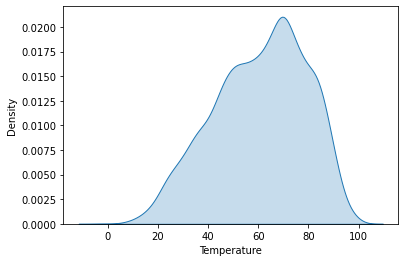

In [47]:
sns.kdeplot(data['Temperature'], shade=True)

the highest distribution of temperature is around 70F

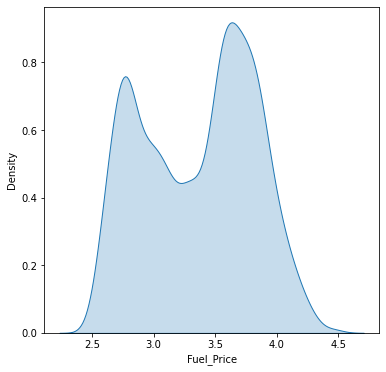

In [5]:
plt.figure(figsize=(6,6))
sns.kdeplot(data['Fuel_Price'], shade=True)
plt.show()

the highest distribution of fuel price is 3.8 followed by 2.8 around 2010 - 2012

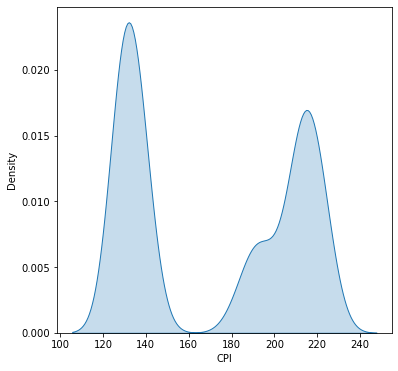

In [6]:
#CPI
plt.figure(figsize=(6,6))
sns.kdeplot(data['CPI'], shade=True)
plt.show()

the highest distribution of cpi around 130 and followed by 210 in range of 2010 - 2012

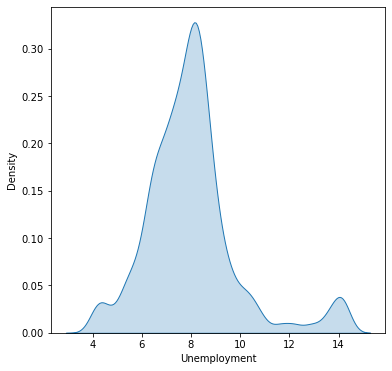

In [7]:
#Unemployement
plt.figure(figsize=(6,6))
sns.kdeplot(data['Unemployment'], shade=True)
plt.show()

the highest distribution of unemployment rate is 8 %

##### Bivariate Analysis

In [7]:
#date vs weekly_sales
date = data.copy()

In [8]:
date['Date'] = pd.to_datetime(date['Date'])

In [9]:
date['month'] = date['Date'].apply(lambda x:pd.to_datetime(x).month)
date['year'] = date['Date'].apply(lambda x:pd.to_datetime(x).year)

In [10]:
monthly_sales = date.groupby(['year', 'month']).agg(monthly_sales = ('Weekly_Sales', 'sum')).reset_index()

In [11]:
monthly_sales.head()

,year,month,monthly_sales
0,2010,1,4.223988e+07
1,2010,2,1.915869e+08
2,2010,3,1.862262e+08
3,2010,4,1.838118e+08
4,2010,5,2.806119e+08


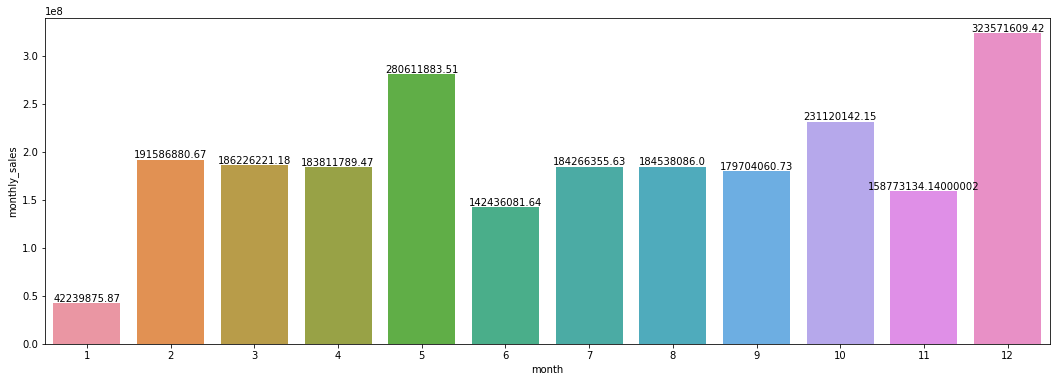

In [20]:
plt.figure(figsize=(18, 6))

ax = sns.barplot(x='month', y='monthly_sales', data=monthly_sales[monthly_sales['year']==2010])

for p in ax.patches:
    ax.annotate(p.get_height(),
                xy = (p.get_x()+p.get_width()/2, p.get_height()),
                ha ='center', va='bottom')

in 2010 for all store, the highest monthly sales are :
1. december, the sales is 323.571.609 US Dollar
2. mei, the sales is 280.611.883 US Dollar
3. october, the sales is 231.120.142 US Dollar

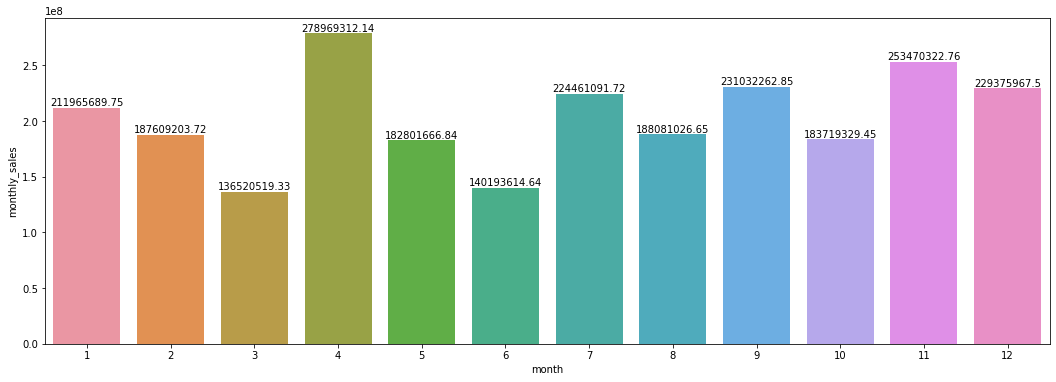

In [21]:
plt.figure(figsize=(18, 6))

ax = sns.barplot(x='month', y='monthly_sales', data=monthly_sales[monthly_sales['year']==2011])

for p in ax.patches:
    ax.annotate(p.get_height(),
                xy = (p.get_x()+p.get_width()/2, p.get_height()),
                ha ='center', va='bottom')

in 2011 for all store, the highest monthly sales are :
1. april, the sum of total sales is 278.969312 US dollar
2. november, the sum of total monthly sales is 253.470.322 US dollar
3. september, the sum of total monthly sales is 231.032.262 US dollar

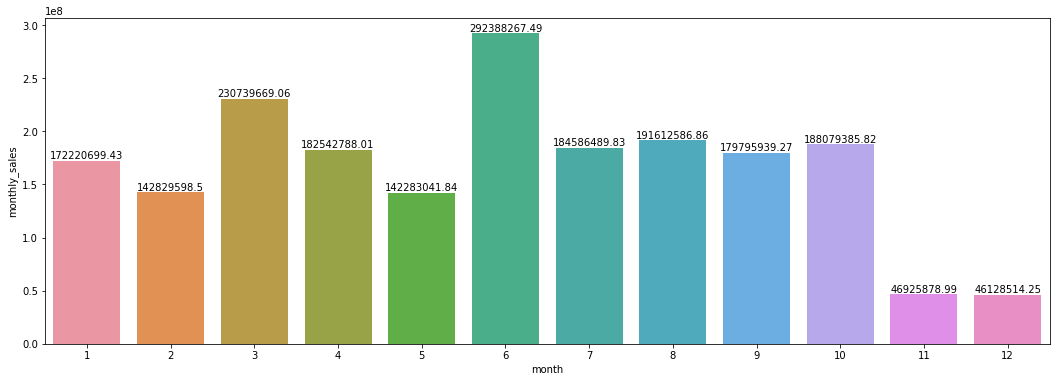

In [22]:
plt.figure(figsize=(18, 6))

ax = sns.barplot(x='month', y='monthly_sales', data=monthly_sales[monthly_sales['year']==2012])

for p in ax.patches:
    ax.annotate(p.get_height(),
                xy = (p.get_x()+p.get_width()/2, p.get_height()),
                ha ='center', va='bottom')

in 2012 for all store, the highest monthly sales are :
1. june, with sum of monthly sales is 292.388.267 US dollar
2. maret, with sum of monthly sales is 230.739.669 US dollar
3. agustus, with sum of monthly sales is 191.612.586 US dollar

In [12]:
year_sales = monthly_sales.groupby(['year']).agg(yearly_sales = ('monthly_sales', 'sum')).reset_index()
year_sales.head()

,year,yearly_sales
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


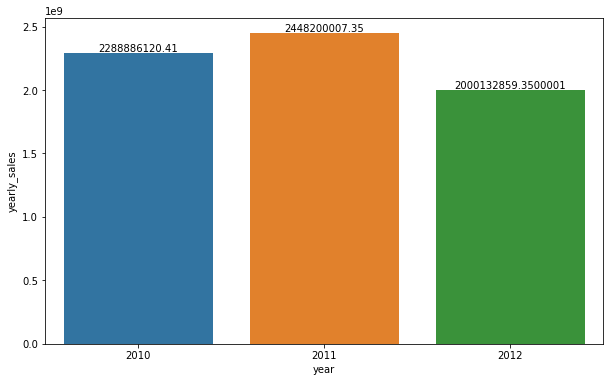

In [13]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='year', y='yearly_sales', data=year_sales)

for p in ax.patches:
    ax.annotate(p.get_height(),
                xy = (p.get_x()+p.get_width()/2, p.get_height()),
                ha ='center', va='bottom')

from 2010 to 2012 in all store wee see that:
1. annual sales in 2010 is 2288886120.41
2. annual sales in 2011 is 2448200007.35
3. annual sales in 2012 is 2000132859.3500001

In [14]:
store_sales = date.groupby(['year', 'month', 'Store']).agg(store_sales = ('Weekly_Sales', 'sum')).reset_index()
store_sales.head()

,year,month,Store,store_sales
0,2010,1,1,1453329.50
1,2010,1,2,1827440.43
2,2010,1,3,358784.10
3,2010,1,4,1842821.02
4,2010,1,5,283178.12


In [15]:
# top 5 highest sales made by store throughout 2010
store_sales[store_sales['year']==2010].sort_values(by=['store_sales'], ascending=False).head(5)

,year,month,Store,store_sales
514,2010,12,20,14693466.41
504,2010,12,10,14281278.92
508,2010,12,14,14157707.28
498,2010,12,4,14144065.01
507,2010,12,13,13854427.04


In [16]:
# top 5 highest sales made by store throughout 2011
store_sales[store_sales['year']==2011].sort_values(by=['store_sales'], ascending=False).head(5)

,year,month,Store,store_sales
694,2011,4,20,13031730.61
678,2011,4,4,12563115.06
688,2011,4,14,12373204.08
687,2011,4,13,11750358.30
993,2011,11,4,11679343.58


In [17]:
# top 5 highest sales made by store throughout 2012
store_sales[store_sales['year']==2012].sort_values(by=['store_sales'], ascending=False).head(5)

,year,month,Store,store_sales
1308,2012,6,4,13302324.98
1324,2012,6,20,13169718.75
1317,2012,6,13,12606613.71
1306,2012,6,2,11701767.08
1318,2012,6,14,11255093.75


In [18]:
#hol_flag vs weekly sales
tabel = pd.pivot_table(date[date['year']==2010], index ='Holiday_Flag', columns='month', values='Weekly_Sales', aggfunc='sum')
tabel

month,1,2,3,4,5,6,7,8,9,10,11,12
Holiday_Flag,,,,,,,,,,,,
0,42239875.87,1.915869e+08,1.862262e+08,1.838118e+08,2.806119e+08,1.424361e+08,1.842664e+08,184538086.0,1.797041e+08,1.854857e+08,92952130.90,2.348024e+08
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.563440e+07,65821003.24,8.876920e+07


In [19]:
tabel.sum(1).astype('float')

Holiday_Flag
0    2.088662e+09
1    2.002246e+08
dtype: float64

in 2010, during non holiday, recording sales in all store is 2.088.662.000 US dollar and during holiday the recording sales is 200.224.600 US dollar

In [20]:
tabel = pd.pivot_table(date[date['year']==2011], index ='Holiday_Flag', columns='month', values='Weekly_Sales', aggfunc='sum')
tabel

month,1,2,3,4,5,6,7,8,9,10,11,12
Holiday_Flag,,,,,,,,,,,,
0,2.119657e+08,1.876092e+08,1.365205e+08,2.789693e+08,1.828017e+08,1.401936e+08,2.244611e+08,1.880810e+08,1.842690e+08,1.837193e+08,1.395405e+08,1.833335e+08
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.676323e+07,NaN,1.139298e+08,4.604246e+07


In [21]:
tabel.sum(1).astype('float')

Holiday_Flag
0    2.241465e+09
1    2.067355e+08
dtype: float64

in 2011, during non holiday recording sales in all store is 2.241.465.000 US dollar and uring holiday, recording sales is 20.673.550 US dollar

In [22]:
tabel = pd.pivot_table(date[date['year']==2012], index ='Holiday_Flag', columns='month', values='Weekly_Sales', aggfunc='sum')
tabel

month,1,2,3,4,5,6,7,8,9,10,11,12
Holiday_Flag,,,,,,,,,,,,
0,1.722207e+08,142829598.5,2.307397e+08,1.825428e+08,1.422830e+08,2.923883e+08,1.362564e+08,1.916126e+08,1.797959e+08,1.380700e+08,46925878.99,46128514.25
1,NaN,NaN,NaN,NaN,NaN,NaN,4.833006e+07,NaN,NaN,5.000941e+07,NaN,NaN


In [23]:
tabel.sum(1).astype('float')

Holiday_Flag
0    1.901793e+09
1    9.833947e+07
dtype: float64

in 2012 during non holiday, the sum of recording sales in all store is 1.902.793.000 US dollar and during holiday the sum of recording sales in all store is 98.339.470 US dollar

no relationship between temperature and weekly sales

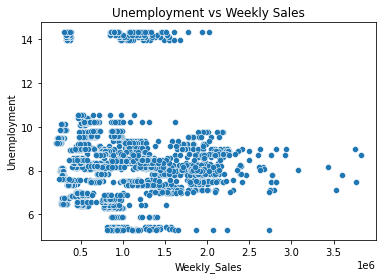

In [20]:
#Unemployment vs Weekly Sales 2010
sns.scatterplot(x='Weekly_Sales', y='Unemployment', data=date[date['year']==2010])
plt.title('Unemployment vs Weekly Sales')
plt.show()

in 2010, the highest unemployment rate has a short range from 500.000 US Dollar to 2.000.000 US dollar but unemployment rate from 0 to 10% has a wide range from 500.000 to 3.500.000 US dollar.

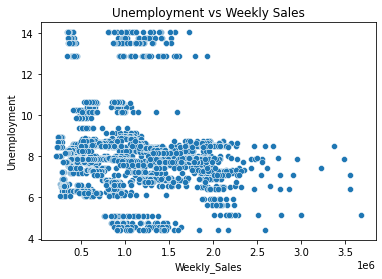

In [22]:
#Unemployment vs Weekly Sales 2011
sns.scatterplot(x='Weekly_Sales', y='Unemployment', data=date[date['year']==2011])
plt.title('Unemployment vs Weekly Sales')
plt.show()

in 2011, the highest unemployment rate has a short range from 500.000 to 2.000.000 US dollar but unemployment rate from 4 to 10 has wide range of weekly sales from 500.000 to 3.500.000 US dollar 

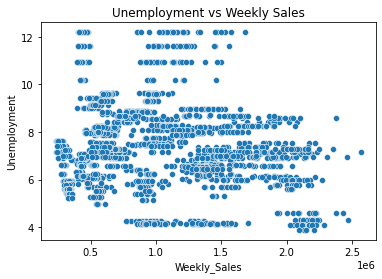

In [23]:
#Unemployment vs Weekly Sales 2012
sns.scatterplot(x='Weekly_Sales', y='Unemployment', data=date[date['year']==2012])
plt.title('Unemployment vs Weekly Sales')
plt.show()

in 2012, the unemployment from 10 to 12 has a short range of weekly sales from around 500.000 to 1.600.000 but unemplyment rate from 4 to 9 has a wide range of weekly sales from 500.000 to 2.500.000 US dollar

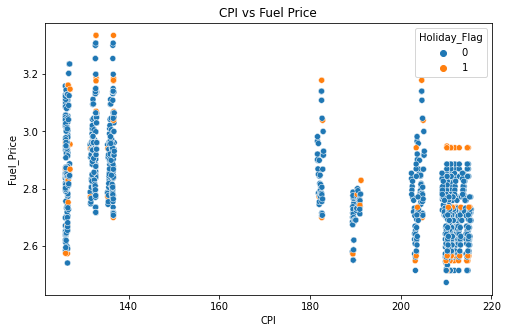

In [36]:
#CPI vs Unemployment
plt.figure(figsize=(8,5))

sns.scatterplot(x = 'CPI', y='Fuel_Price', data=date[date['year']==2010], hue='Holiday_Flag')
plt.xlabel('CPI')
plt.ylabel('Fuel_Price')
plt.title('CPI vs Fuel Price')
plt.show()

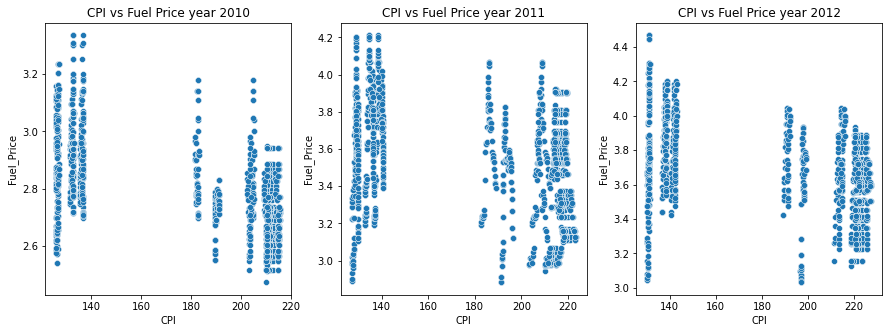

In [44]:
plt.figure(figsize=(15,5))
year = [2010, 2011, 2012]

for x in range(len(year)):
    plt.subplot(1,3,x+1)
    sns.scatterplot(x = 'CPI', y='Fuel_Price', data=date[date['year']==year[x]])
    plt.xlabel('CPI')
    plt.ylabel('Fuel_Price')
    plt.title('CPI vs Fuel Price year {}'.format(year[x]))

plt.show()

lower CPI group and higher CPI group estimately have a same range of fuel price in 2010 - 2012. CPI does not influence of fuel price

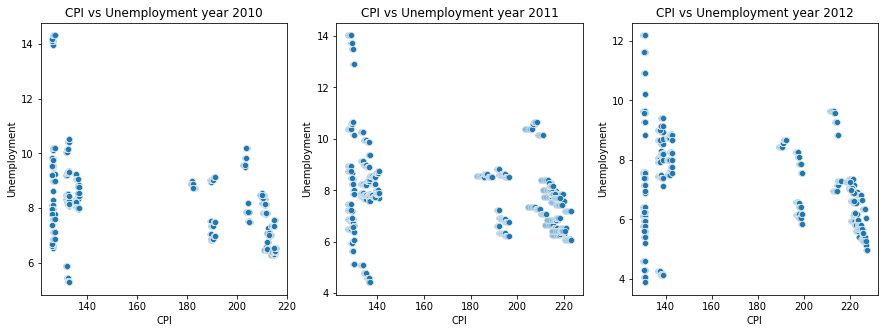

In [45]:
plt.figure(figsize=(15,5))
year = [2010, 2011, 2012]

for x in range(len(year)):
    plt.subplot(1,3,x+1)
    sns.scatterplot(x = 'CPI', y='Unemployment', data=date[date['year']==year[x]])
    plt.xlabel('CPI')
    plt.ylabel('Unemployment')
    plt.title('CPI vs Unemployment year {}'.format(year[x]))

plt.show()

lower CPI group and higher CPi group estimately have a same range of unemployment from 2010 to 2012.

#### Data Cleansing

In [5]:
df = data.copy()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['weekday'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month 
df['year'] = df['Date'].dt.year

In [8]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


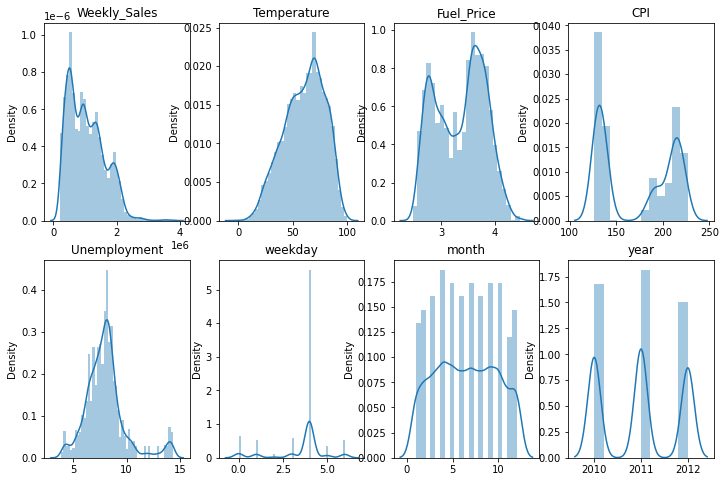

In [9]:
#cek normalitas

cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'weekday', 'month', 'year']

plt.figure(figsize=(12,8))

for x in range(len(df[cols].columns)):
    plt.subplot(2,4, x+1)
    sns.distplot(x=df[cols[x]]).set_title(cols[x])

plt.show()

In [10]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,12.000000,2012.000000


weekly sales, month have higher standard deviation

In [12]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
weekday         0
month           0
year            0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
#ubah temperatur dari fahrenheit ke celcius (feature engineering 1)
df['Temperature /C'] = (5/9)*(df['Temperature']-32)

In [15]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year,Temperature /C
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010,5.727778
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010,3.616667
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010,4.405556
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010,8.127778
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010,8.055556


In [16]:
df = df.drop(['Temperature'], axis=1)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,weekday,month,year,Temperature /C
0,1,2010-05-02,1643690.90,0,2.572,211.096358,8.106,6,5,2010,5.727778
1,1,2010-12-02,1641957.44,1,2.548,211.242170,8.106,3,12,2010,3.616667
2,1,2010-02-19,1611968.17,0,2.514,211.289143,8.106,4,2,2010,4.405556
3,1,2010-02-26,1409727.59,0,2.561,211.319643,8.106,4,2,2010,8.127778
4,1,2010-05-03,1554806.68,0,2.625,211.350143,8.106,0,5,2010,8.055556


outlier numerik


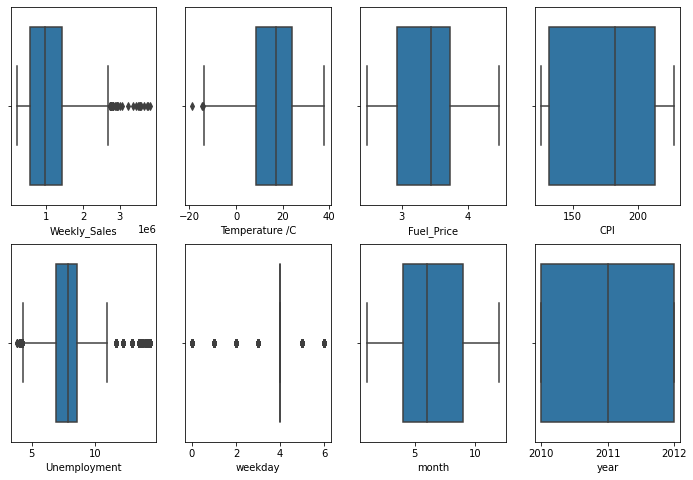

In [17]:
#cek outlier
cols = ['Weekly_Sales', 'Temperature /C', 'Fuel_Price', 'CPI', 'Unemployment', 'weekday', 'month', 'year']

def plot_data(data):
    plt.figure(figsize=(12,8))

    for x in range(len(data[cols].columns)):
        plt.subplot(2,4, x+1)
        sns.boxplot(x=df[cols].columns[x],
               data=data)
        
plt.show()
print('outlier numerik')
plot_data(df)

the lowest temperature of america is 11 degree celcius in average and below 11 degree celcius will be removed. outlier of columns of weekly sales, unemployment, and weekday will not be removed because those are still make sense 

In [18]:
def remove_outlier(data):
        q1 = data['Temperature /C'].quantile(0.25)
        q3 = data['Temperature /C'].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        cond1 = data['Temperature /C'] < lower
        data['Temperature /C'] = np.where(cond1, lower, data['Temperature /C'])

remove_outlier(df)

<AxesSubplot:xlabel='Temperature /C'>

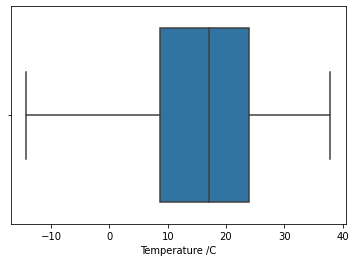

In [19]:
sns.boxplot(x='Temperature /C', data=df)

#### Feature Engineering

##### Feature Selection

In [20]:
from scipy.stats import chi2_contingency, pearsonr

In [21]:
cols = ['Temperature /C', 'Fuel_Price', 'CPI', 'Unemployment', 'weekday', 'month', 'year']

p_array = []

for col in cols:
    p,_ = pearsonr(df['Weekly_Sales'], df[col])
    p_array.append(p)
    
df_p = pd.DataFrame({'Variabel':cols,
                     'P-Value':p_array})
df_p.sort_values(by=['P-Value'], ascending=False)
df_p

,Variabel,P-Value
0,Temperature /C,-0.063888
1,Fuel_Price,0.009464
2,CPI,-0.072634
3,Unemployment,-0.106176
4,weekday,-0.021041
5,month,0.067535
6,year,-0.018378


In [22]:
#dummies
def nominal(data, col):
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    return data
    
df = nominal(df, 'Holiday_Flag')
df = nominal(df, 'year')
df = nominal(df, 'weekday')
df = nominal(df, 'month')
df = nominal(df, 'Store')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 80 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Store           6435 non-null   int64         
 1   Date            6435 non-null   datetime64[ns]
 2   Weekly_Sales    6435 non-null   float64       
 3   Holiday_Flag    6435 non-null   int64         
 4   Fuel_Price      6435 non-null   float64       
 5   CPI             6435 non-null   float64       
 6   Unemployment    6435 non-null   float64       
 7   weekday         6435 non-null   int64         
 8   month           6435 non-null   int64         
 9   year            6435 non-null   int64         
 10  Temperature /C  6435 non-null   float64       
 11  Holiday_Flag_0  6435 non-null   uint8         
 12  Holiday_Flag_1  6435 non-null   uint8         
 13  year_2010       6435 non-null   uint8         
 14  year_2011       6435 non-null   uint8         
 15  year

In [23]:
#drop kolom tidak perlu
cols = ['Store', 'Date', 'Holiday_Flag', 'month', 'year', 'weekday']

for col in cols:
    df = df.drop(col, axis=1)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 74 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Weekly_Sales    6435 non-null   float64
 1   Fuel_Price      6435 non-null   float64
 2   CPI             6435 non-null   float64
 3   Unemployment    6435 non-null   float64
 4   Temperature /C  6435 non-null   float64
 5   Holiday_Flag_0  6435 non-null   uint8  
 6   Holiday_Flag_1  6435 non-null   uint8  
 7   year_2010       6435 non-null   uint8  
 8   year_2011       6435 non-null   uint8  
 9   year_2012       6435 non-null   uint8  
 10  weekday_0       6435 non-null   uint8  
 11  weekday_1       6435 non-null   uint8  
 12  weekday_2       6435 non-null   uint8  
 13  weekday_3       6435 non-null   uint8  
 14  weekday_4       6435 non-null   uint8  
 15  weekday_5       6435 non-null   uint8  
 16  weekday_6       6435 non-null   uint8  
 17  month_1         6435 non-null   u

In [24]:
#transformasi log pada kolom weekly sales
tmp_data = df.copy()
tmp_data['log weekly sales'] = np.log2(tmp_data['Weekly_Sales']+1)
tmp_data['log weekly sales'].describe()

count    6435.000000
mean       19.767677
std         0.848739
min        17.679942
25%        19.077835
50%        19.873797
75%        20.437622
max        21.864645
Name: log weekly sales, dtype: float64

In [25]:
tmp_data = tmp_data.drop(['Weekly_Sales'], axis=1)
tmp_data.head(3)

,Fuel_Price,CPI,Unemployment,Temperature /C,Holiday_Flag_0,Holiday_Flag_1,year_2010,year_2011,year_2012,weekday_0,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,log weekly sales
0,2.572,211.096358,8.106,5.727778,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,20.648508
1,2.548,211.242170,8.106,3.616667,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,20.646986
2,2.514,211.289143,8.106,4.405556,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,20.620393


In [26]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fuel_Price        6435 non-null   float64
 1   CPI               6435 non-null   float64
 2   Unemployment      6435 non-null   float64
 3   Temperature /C    6435 non-null   float64
 4   Holiday_Flag_0    6435 non-null   uint8  
 5   Holiday_Flag_1    6435 non-null   uint8  
 6   year_2010         6435 non-null   uint8  
 7   year_2011         6435 non-null   uint8  
 8   year_2012         6435 non-null   uint8  
 9   weekday_0         6435 non-null   uint8  
 10  weekday_1         6435 non-null   uint8  
 11  weekday_2         6435 non-null   uint8  
 12  weekday_3         6435 non-null   uint8  
 13  weekday_4         6435 non-null   uint8  
 14  weekday_5         6435 non-null   uint8  
 15  weekday_6         6435 non-null   uint8  
 16  month_1           6435 non-null   uint8  


#### Linear Regression Assumptions

In [27]:
import statsmodels.api as sm

In [28]:
#split into x & Y
y = tmp_data['log weekly sales']
X = tmp_data.drop(['log weekly sales'], axis=1)

# Define the modell
X = sm.add_constant(X)
model = sm.OLS(y, X)

#fit the model
result = model.fit()

#print results summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       log weekly sales   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     2552.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:00:56   Log-Likelihood:                 2675.9
No. Observations:                6435   AIC:                            -5214.
Df Residuals:                    6366   BIC:                            -4747.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.8960      0.128     69.

In [29]:
#checking normality
residuals = result.resid
residuals

0       0.079219
1      -0.059301
2       0.049064
3      -0.143155
4      -0.013592
          ...   
6430   -0.051259
6431   -0.051032
6432   -0.268663
6433   -0.065649
6434    0.017546
Length: 6435, dtype: float64

<AxesSubplot:ylabel='Density'>

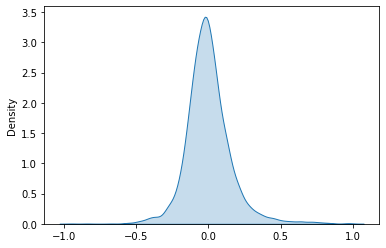

In [30]:
sns.kdeplot(residuals, shade=True)

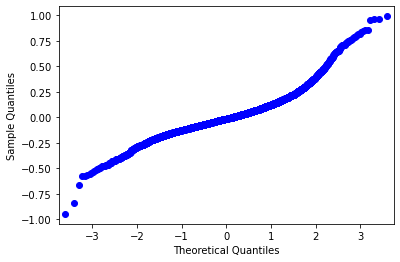

In [31]:
sm.qqplot(residuals)
plt.show()

In [32]:
#checking multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
{X.columns[i]: variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])}

{'Fuel_Price': 7.882012476616382,
 'CPI': 910.3957551496329,
 'Unemployment': 20.294633199265245,
 'Temperature /C': 2.790463607673023,
 'Holiday_Flag_0': inf,
 'Holiday_Flag_1': inf,
 'year_2010': inf,
 'year_2011': inf,
 'year_2012': inf,
 'weekday_0': inf,
 'weekday_1': inf,
 'weekday_2': inf,
 'weekday_3': inf,
 'weekday_4': inf,
 'weekday_5': inf,
 'weekday_6': inf,
 'month_1': inf,
 'month_2': inf,
 'month_3': inf,
 'month_4': inf,
 'month_5': inf,
 'month_6': inf,
 'month_7': inf,
 'month_8': inf,
 'month_9': inf,
 'month_10': inf,
 'month_11': inf,
 'month_12': inf,
 'Store_1': inf,
 'Store_2': inf,
 'Store_3': inf,
 'Store_4': inf,
 'Store_5': inf,
 'Store_6': inf,
 'Store_7': inf,
 'Store_8': inf,
 'Store_9': inf,
 'Store_10': inf,
 'Store_11': inf,
 'Store_12': inf,
 'Store_13': inf,
 'Store_14': inf,
 'Store_15': inf,
 'Store_16': inf,
 'Store_17': inf,
 'Store_18': inf,
 'Store_19': inf,
 'Store_20': inf,
 'Store_21': inf,
 'Store_22': inf,
 'Store_23': inf,
 'Store_24': i

column fuel price cpi and unemployment have strong multicollinearity

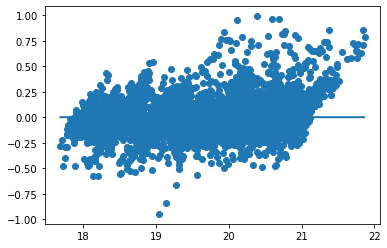

In [33]:
#checking homoscedascity
plt.scatter(y, residuals)
plt.plot(y, [0]*len(y))

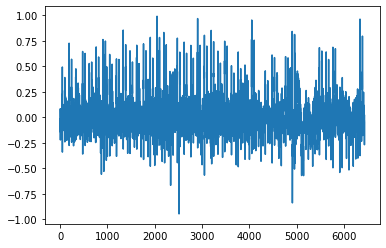

In [34]:
#checking error term uncorellated with each other
plt.plot(residuals.index, residuals)

#### PCA Analysis for Multicollinearity

In [35]:
tmp_data.columns

Index(['Fuel_Price', 'CPI', 'Unemployment', 'Temperature /C', 'Holiday_Flag_0',
       'Holiday_Flag_1', 'year_2010', 'year_2011', 'year_2012', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5',
       'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11',
       'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17',
       'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23',
       'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29',
       'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35',
       'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41',
       'Store_42', 'Store_43', 'Store_44', 'Store_45', 'log weekly sales'],
 

In [30]:
tmp_data.iloc[:,0:4]

,Fuel_Price,CPI,Unemployment,Temperature /C
0,2.572,211.096358,8.106,5.727778
1,2.548,211.242170,8.106,3.616667
2,2.514,211.289143,8.106,4.405556
3,2.561,211.319643,8.106,8.127778
4,2.625,211.350143,8.106,8.055556
...,...,...,...,...
6430,3.997,192.013558,8.684,18.266667
6431,3.985,192.170412,8.667,18.272222
6432,4.000,192.327265,8.667,12.483333
6433,3.969,192.330854,8.667,13.594444


In [36]:
#Scalling Data

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

y = tmp_data['log weekly sales']
X = tmp_data.drop(['log weekly sales'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_new = X_train.iloc[:,0:4]
X_test_new = X_test.iloc[:,0:4]
X_train = X_train.drop(['Fuel_Price', 'CPI', 'Unemployment', 'Temperature /C'], axis = 1)
X_test = X_test.drop(['Fuel_Price', 'CPI', 'Unemployment', 'Temperature /C'], axis = 1)

X_train = pd.DataFrame(X_train, columns=['Holiday_Flag_0',
       'Holiday_Flag_1', 'year_2010', 'year_2011', 'year_2012', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5',
       'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11',
       'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17',
       'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23',
       'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29',
       'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35',
       'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41',
       'Store_42', 'Store_43', 'Store_44', 'Store_45'])

X_test = pd.DataFrame(X_test, columns=['Holiday_Flag_0',
       'Holiday_Flag_1', 'year_2010', 'year_2011', 'year_2012', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5',
       'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11',
       'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17',
       'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23',
       'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29',
       'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35',
       'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41',
       'Store_42', 'Store_43', 'Store_44', 'Store_45'])

In [37]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train_new)
X_test_std = std.transform(X_test_new)

<AxesSubplot:>

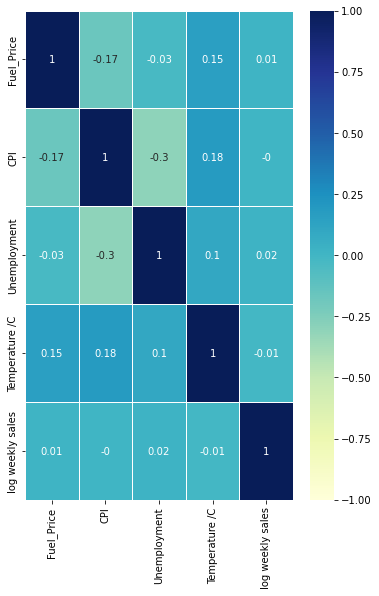

In [38]:
#Correlations
tmp_data_scaled = pd.DataFrame(X_train_std, columns=['Fuel_Price', 'CPI', 'Unemployment', 'Temperature /C'])
tmp_data_scaled['log weekly sales'] = y_train

corr = tmp_data_scaled.corr()

plt.figure(figsize=(6,9))
sns.heatmap(round(corr,2), annot=True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)

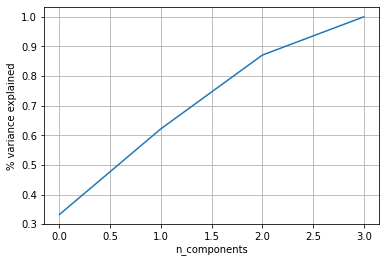

In [39]:
#PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = X_train_std.shape[1])
pca_data = pca.fit_transform(X_train_std)

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

plt.plot(cumm_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("% variance explained")
plt.show()

In [40]:
cumm_var_explained

array([0.33248778, 0.6218139 , 0.87087135, 1.        ])

In [41]:
pca.explained_variance_

array([1.33020949, 1.15752933, 0.99642338, 0.51661495])

In [42]:
sum(pca.explained_variance_ratio_)

1.0000000000000002

In [43]:
pca = PCA(n_components=4)
pca_train_data = pca.fit_transform(X_train_std)
pca_test_data = pca.transform(X_test_std)

<AxesSubplot:>

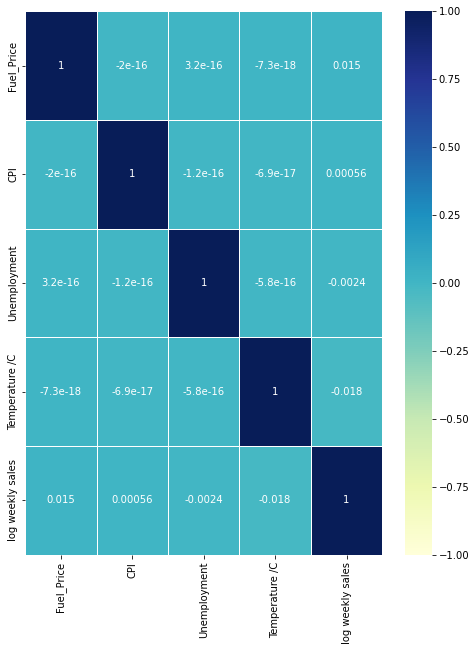

In [44]:
#Correlation after PCA
df_train_pca = pd.DataFrame(pca_train_data, columns=['Fuel_Price', 'CPI', 'Unemployment', 'Temperature /C'])
df_train_pca['log weekly sales'] = y_train

corr = df_train_pca.corr()
plt.figure(figsize = (8,10))

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)

In [45]:
X_train_pca = pd.DataFrame(pca_train_data, index=X_train.index, columns=['Fuel_Price', 'CPI', 'Unemployment', 'Temperature /C'])
X_train_join = pd.concat([X_train_pca, X_train], axis=1)
X_test_pca = pd.DataFrame(pca_test_data, index=X_test.index, columns=['Fuel_Price', 'CPI', 'Unemployment', 'Temperature /C'])
X_test_join = pd.concat([X_test_pca, X_test], axis=1)

#### Modelling

##### Linear Regrresion Modelling

In [46]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import sklearn.metrics as metrics

In [47]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train_join, y_train)
y_pred = LR.predict(X_test_join)

coef = LR.coef_
intercept = LR.intercept_

In [48]:
# MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# R Squared - Coefficient of Determination
print('R Squared:', round(metrics.r2_score(y_test, y_pred),2))

MAE: 0.11423152231995153
MSE: 0.0258301217741544
RMSE: 0.1607175216774898
R Squared: 0.97


In [54]:
from sklearn.linear_model import Ridge, Lasso

In [57]:
#create model
ridge = Ridge()
lasso = Lasso()

#use model to fit data
ridge.fit(X_train_join, y_train)
lasso.fit(X_train_join, y_train)

#predict data
y_pred_ridge = ridge.predict(X_test_join)
y_pred_lasso = lasso.predict(X_test_join)

#evaluating model
model = ['Ridge', 'Lasso']
model_pred = [y_pred_ridge, y_pred_lasso]
mse = []
mae = []
rmse = []
r2_score = []

for x in range(len(model)):
    mae.append(metrics.mean_absolute_error(y_test, model_pred[i]))
    mse.append(metrics.mean_squared_error(y_test, model_pred[i]))
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, model_pred[i])))
    r2_score.append(round(metrics.r2_score(y_test, model_pred[i]),2))

all_pred = pd.DataFrame({'MAE':mae, 'MSE':mse,
                        'RMSE':rmse, 'R Square':r2_score}, index=model)
all_pred

,MAE,MSE,RMSE,R Square
Ridge,0.114217,0.025912,0.160972,0.97
Lasso,0.114217,0.025912,0.160972,0.97
